**MSc Computational Physics AUTH**<br>
**Computational Quantum Physics**<br>
**Academic Year: 2023-2024**<br>
**Semester 2**<br>
**Implemented by: Ioannis Stergakis**<br>
**AEM: 4439**<br>

# **FINAL PROJECT 1:** ***Calculating the Roothaan-Hartree-Fock Ground-State atomic wavefunctions for $He$ through $Ne$***
**Jupyter Notebook**<br> 

**Contents:**<br>
*->1. Codes<br>
->2. Results*

## **1. Codes**

### **1.1 Modules importing and symbols definition**

In [1]:
# Modules import

# Module for numerical calculations
import numpy as np

# Module for symbolic calculations and expressions display
import sympy as smp

# Package for integrating
from scipy.integrate import quad

# Module for additional math expressions like factorial
import math as math

# Module for time measurement
import time as time

# Package for presenting the results in a compact way
from prettytable import PrettyTable

# Module for plotting
import matplotlib.pyplot as plt

In [2]:
# Useful symbols definition
r,k,theta,phi,z = smp.symbols("r,k,θ,φ,z")
pi = smp.pi
I = smp.I
inf = np.Infinity

### **1.2 Elements and orbitals data structure**

In [3]:
# Helium (He,Z=2)
# s-orbitals
He_S = [["n_js","Z_j1","C_j1s"],
        [1,1.4595,1.347900],
        [3,5.3244,-0.001613],
        [2,2.6298,-0.100506],
        [2,1.7504,-0.270779]]
# p-orbitals
He_P = [["n_jp","Z_jp","C_j2p"],
        []]
He = [He_S,He_P]

# Lithium (Li,Z=3)
# s-orbitals
Li_S = [["n_js","Z_js","C_j1s","C_j2s"],
        [1,4.3069,0.141279,-0.022416],
        [1,2.4573,0.874231,-0.135791],
        [3,6.7850,-0.005201,0.000389],
        [2,7.4527,-0.002307,-0.000068],
        [2,1.8504,0.006985,-0.076544],
        [2,0.7667,-0.000305,0.340542],
        [2,0.6364,0.00076,0.715708]]
# p-orbitals
Li_P = [["n_jp","Z_jp","C_j2p"],
        []]
Li = [Li_S,Li_P]

# Beryllium (Be,Z=4)
# s-orbitals
Be_S = [["n_js","Z_js","C_j1s","C_j2s"],
        [1,5.7531,0.285107,-0.016378],
        [1,3.7156,0.474813,-0.155066],
        [3,9.9670,-0.001620,0.000426],
        [3,3.7128,0.052852,-0.059234],
        [2,4.4661,0.243499,-0.031925],
        [2,1.2919,0.000106,0.387968],
        [2,0.8555,-0.000032,0.685674]]
# p-orbitals
Be_P = [["n_jp","Z_jp","C_j2p"],
        []]
Be = [Be_S,Be_P]

# Boron (B,Z=5)
# s-orbitals
B_S = [["n_js","Z_js","C_j1s","C_j2s"],
        [1,7.0178,0.381607,-0.022549],
        [1,3.9468,0.423958,0.321716],
        [3,12.7297,-0.001316,-0.000452],
        [3,2.7646,-0.000822,-0.072032],
        [2,5.7420,0.237016,-0.050313],
        [2,1.5436,0.001062,-0.484281],
        [2,1.0802,-0.000137,-0.518986]]
# p-orbitals
B_P = [["n_jp","Z_jp","C_j2p"],
        [2,5.7416,0.007600],
        [2,2.6341,0.045137],
        [2,1.8340,0.184206],
        [2,1.1919,0.394754],
        [2,0.8494,0.432795]]
B = [B_S,B_P]

# Carbon (C,Z=6)
# s-orbitals
C_S = [["n_js","Z_js","C_j1s","C_j2s"],
        [1,8.4936,0.352872,-0.071727],
        [1,4.8788,0.473621,0.438307],
        [3,15.4660,-0.001199,-0.000383],
        [2,7.0500,0.210887,-0.091194],
        [2,2.2640,0.000886,-0.393105],
        [2,1.4747,0.000465,-0.579121],
        [2,1.1639,-0.000119,-0.126067]]
# p-orbitals
C_P = [["n_jp","Z_jp","C_j2p"],
        [2,7.0500,0.006977],
        [2,3.2275,0.070877],
        [2,2.1908,0.230802],
        [2,1.4413,0.411931],
        [2,1.0242,0.350701]]
C = [C_S,C_P]

# Nitrogen (N,Z=7)
# s-orbitals
N_S = [["n_js","Z_js","C_j1s","C_j2s"],
        [1,9.9051,0.354839,-0.067498],
        [1,5.7429,0.472579,0.434142],
        [3,17.9816,-0.001038,-0.000315],
        [2,8.3087,0.208492,-0.080331],
        [2,2.7611,0.001687,-0.374128],
        [2,1.8223,0.000206,-0.522775],
        [2,1.4191,0.000064,-0.207735]]
# p-orbitals
N_P = [["n_jp","Z_jp","C_j2p"],
        [2,8.3490,0.006323],
        [2,3.8827,0.082938],
        [2,2.5920,0.260147],
        [2,1.6946,0.418361],
        [2,1.1914,0.308272]]
N = [N_S,N_P]

# Oxygen (O,Z=8)
# s-orbitals
O_S = [["n_js","Z_js","C_j1s","C_j2s"],
        [1,11.2970,0.360063,-0.064363],
        [1,6.5966,0.466625,0.433186],
        [3,20.5019,-0.000918,-0.000275],
        [2,9.5546,0.208441,-0.072497],
        [2,3.2482,0.002018,-0.369900],
        [2,2.1608,0.000216,-0.512627],
        [2,1.6411,0.000133,-0.227421]]
# p-orbitals
O_P = [["n_jp","Z_jp","C_j2p"],
        [2,9.6471,0.005626],
        [2,4.3323,0.126618],
        [2,2.7502,0.328966],
        [2,1.7525,0.395422],
        [2,1.2473,0.231788]]
O = [O_S,O_P]

# Fluorine (F,Z=9)
# s-orbitals
F_S = [["n_js","Z_js","C_j1s","C_j2s"],
        [1,12.6074,0.377498,-0.058489],
        [1,7.4101,0.443947,0.426450],
        [3,23.2475,-0.000797,-0.000274],
        [2,10.7416,0.213846,-0.063457],
        [2,3.7543,0.002183,-0.358939],
        [2,2.5009,0.000335,-0.516660],
        [2,1.8577,0.000147,-0.239143]]
# p-orbitals
F_P = [["n_jp","Z_jp","C_j2p"],
        [2,11.0134,0.004879],
        [2,4.9962,0.130794],
        [2,3.1540,0.337876],
        [2,1.9722,0.396122],
        [2,1.3632,0.225374]]
F = [F_S,F_P]

# Neon (Ne,Z=10)
# s-orbitals
Ne_S = [["n_js","Z_js","C_j1s","C_j2s"],
        [1,13.9074,0.392290,-0.053023],
        [1,8.2187,0.425817,0.419502],
        [3,26.0325,-0.000702,-0.000263],
        [2,11.9249,0.217206,-0.055723],
        [2,4.2635,0.002300,-0.349457],
        [2,2.8357,0.000463,-0.523070],
        [2,2.0715,0.000147,-0.246038]]
# p-orbitals
Ne_P = [["n_jp","Z_jp","C_j2p"],
        [2,12.3239,0.004391],
        [2,5.6525,0.133955],
        [2,3.5570,0.342978],
        [2,2.2056,0.395742],
        [2,1.4948,0.221831]]
Ne = [Ne_S,Ne_P]

# Data table of Elements
elements = [
    [2, He,'He'],
    [3, Li,'Li'],
    [4, Be,'Be'],
    [5, B,'B'],
    [6, C,'C'],
    [7, N,'N'],
    [8, O,'O'],
    [9, F,'F'],
    [10, Ne,'Ne']]

# Find element data by its atomic number Z
def find_elmt_data(Z):
    m = len(elements)
    for i in range(0,m):
        if elements[i][0]==Z:
            return elements[i][1]
            break
    return 'no element'

# Find element name by its atomic number Z
def find_elmt_name(Z):
    m = len(elements)
    for i in range(0,m):
        if elements[i][0]==Z:
            return elements[i][2]
            break
    # not-found the atomic number case    
    return 'no element'

# Orbital name table according to momentum quantum number l
orb_name_table = [
    [0,"s"],
    [1,"p"],
    [2,"d"],
    [3,"f"]
] 

# Find orbital's name by its principal and azimuthal quantum number n,l
def find_orb_name(n,l):
    m = len(orb_name_table)
    for i in range(0,m):
        if orb_name_table[i][0]==l:
            return str(n)+orb_name_table[i][1]
            break
    # not-found the azimuthal quantum number l case    
    return 'no orbital'    

### **1.3 RHF Radial wave-functions $R_{nl}(r)$ calculation**

In [4]:
# Normalization constant Njl
def Njl(z,n):
    return np.power(2*z,n+0.5)/np.power(math.factorial(2*n),0.5)

# Slater-type atomic orbitals (STO) in position (r) space
def Srjl(r,z,n):
    return Njl(z,n)*r**(n-1)*smp.exp(-z*r)

# RHF radial position-wave functions R = R_nl(r)
def Rnl(r,n,l,Z):
    Elmt = find_elmt_data(Z) # finding the element and returning its data
    Elmt_orb = Elmt[l] # choosing the orbital's data from the element's data
    q = len(Elmt_orb) # length of the orbital's data table
    R = 0 # initializing the Rnl(r) value
    # performing iterative sequence for the linear combination that results to the final Rnl(r) value
    for j in range(1,q):
        n_orb = Elmt_orb[j][0] # principal quantum number of the jth contributing Slater-type orbital
        z = Elmt_orb[j][1] # orbital's exponent of the jth contributing Slater-type orbital
        c = Elmt_orb[j][n+1-l] # linear combination's coefficient for the jth contributing Slater-type orbital
        R = R + c*Srjl(r,z,n_orb)
    return R 

# Normalization check
def I_Rnl(r,n,l,Z):
    return quad(lambda r: Rnl(r,n,l,Z)**2*r**2,0,inf)[0] 

# taking the [0] element of quad, the [1] element of quad contains the error in the calculation of the integral

In [5]:
# Sr1s
Srjl(r,z,1)

2.0*z**1.5*exp(-r*z)

In [6]:
# Sr2s
Srjl(r,z,2)

1.15470053837925*r*z**2.5*exp(-r*z)

In [7]:
# Sr3s
Srjl(r,z,3)

0.421637021355784*r**2*z**3.5*exp(-r*z)

In [8]:
# Sr2p
Srjl(r,z,2)

1.15470053837925*r*z**2.5*exp(-r*z)

In [9]:
# Plotting the radial position-space RHF wave-function R_nl(r)
def plot_Rnl(min_r,max_r,n,l,Z,axis):
    elmt_name = find_elmt_name(Z)
    plot_points = 200
    r_vals = np.linspace(min_r,max_r,plot_points)
    phi_sq_vals = []
    for i in range(0,plot_points):
        phi_sq = (Rnl(r_vals[i],n,l,Z)*r_vals[i])**2
        phi_sq_vals.append(phi_sq)

    axis.plot(r_vals,phi_sq_vals,label="$_{%d}%s$"%(Z,elmt_name))

### **1.4 RHF Momentum wave-functions $K_{nl}(k)$ calculation**

In [10]:
# Slater-type orbitals Sjl(k) or Skjl in momentum (k) space

# Sk1s
def Sk1s(z,k):
    return (1/(2*pi)**(3/2))*16*pi*z**(5/2)/((z**2 + k**2)**2)

# Sk2s
def Sk2s(z,k):
    return (1/(2*pi)**(3/2))*16*pi*z**(5/2)*(3*z**2-k**2)/(np.sqrt(3)*(z**2+k**2)**3)

# Sk3s
def Sk3s(z,k):
    return (1/(2*pi)**(3/2))*64*np.sqrt(10)*pi*z**(9/2)*(z**2-k**2)/(5*(z**2+k**2)**4)

# Sk2p
def Sk2p(z,k):
    return (1/(2*pi)**(3/2))*64*pi*k*z**(7/2)/(np.sqrt(3)*(z**2+k**2)**3)

# Sk3p (this orbital is just defined for filling the matrix below)
def Sk3p(z,k):
    return (1/(2*pi)**(3/2))*64*np.sqrt(10)*pi*k*z**(7/2)*(5*z**2-k**2)/(15*(z**2+k**2)**4)

# Skjl matrix
def Skjl(z,k):
    sk_mat = []
    sk_mat.append((Sk1s(z,k),np.NAN))
    sk_mat.append((Sk2s(z,k),Sk2p(z,k)))
    sk_mat.append((Sk3s(z,k),Sk3p(z,k)))
    return smp.Matrix(sk_mat)

# RHF radial momentum-wave functions K = R_nl(k)
def Knl(k,n,l,Z):
    Elmt = find_elmt_data(Z) # finding the element and returning its data
    Elmt_orb = Elmt[l] # choosing the orbital's data from the element's data
    q = len(Elmt_orb) # length of the orbital's data table
    K = 0 # initializing the Rnl(k) value
    # performing iterative sequence for the linear combination that results to the final Rnl(k) value
    for j in range(1,q):
        n_orb = Elmt_orb[j][0] # principal quantum number of the jth contributing Slater-type orbital
        z = Elmt_orb[j][1] # orbital's exponent of the jth contributing Slater-type orbital
        c = Elmt_orb[j][n+1-l] # linear combination's coefficient for the jth contributing Slater-type orbital
        K = K + c*Skjl(z,k)[n_orb-1,l].evalf()
    return K 

# Normalization check
def I_Knl(k,n,l,Z):
    return quad(lambda k: Knl(k,n,l,Z)**2*k**2,0,inf)[0]

In [11]:
# Skjl Matrix
Skjl(z,k)

Matrix([
[                5.65685424949238*z**2.5/(pi**0.5*(k**2 + z**2)**2),                                                                   nan],
[3.2659863237109*z**2.5*(-k**2 + 3*z**2)/(pi**0.5*(k**2 + z**2)**3),                  13.0639452948436*k*z**3.5/(pi**0.5*(k**2 + z**2)**3)],
[ 14.3108350559987*z**4.5*(-k**2 + z**2)/(pi**0.5*(k**2 + z**2)**4), 4.77027835199955*k*z**3.5*(-k**2 + 5*z**2)/(pi**0.5*(k**2 + z**2)**4)]])

In [12]:
#Sk1s
Skjl(z,k)[0,0]

5.65685424949238*z**2.5/(pi**0.5*(k**2 + z**2)**2)

In [13]:
#Sk2s
Skjl(z,k)[1,0]

3.2659863237109*z**2.5*(-k**2 + 3*z**2)/(pi**0.5*(k**2 + z**2)**3)

In [14]:
#Sk3s
Skjl(z,k)[2,0]

14.3108350559987*z**4.5*(-k**2 + z**2)/(pi**0.5*(k**2 + z**2)**4)

In [15]:
#Sk2p
Skjl(z,k)[1,1]

13.0639452948436*k*z**3.5/(pi**0.5*(k**2 + z**2)**3)

In [16]:
#Sk3p
Skjl(z,k)[2,1]

4.77027835199955*k*z**3.5*(-k**2 + 5*z**2)/(pi**0.5*(k**2 + z**2)**4)

In [17]:
# Plotting the radial position-space RHF wave-function K_nl(k)
def plot_Knl(min_k,max_k,n,l,Z,axis):
    elmt_name = find_elmt_name(Z)
    plot_points = 200
    k_vals = np.linspace(min_k,max_k,plot_points)
    phi_sq_vals = []
    for i in range(0,plot_points):
        phi_sq = (Knl(k_vals[i],n,l,Z)*k_vals[i])**2
        phi_sq_vals.append(phi_sq)

    axis.plot(k_vals,phi_sq_vals,label="$_{%d}%s$"%(Z,elmt_name))

### **1.5 Calculation of the density distributions and entropies**

#### **1.5.1 Preliminaries**

In [18]:
# Filling queue of the atomic orbitals by electrons at ground state
orb_fill_queue = smp.Matrix([["n","l"],[1,0],[2,0],[2,1]])
orb_fill_queue

Matrix([
[n, l],
[1, 0],
[2, 0],
[2, 1]])

In [19]:
# Electrons distribution in atomic orbitals at atom's ground-state
def e_orb_dist(Z):
    electron_dist = []
    orb_names = []
    N_e = Z # number of electrons at neutral atom
    m = int(len(orb_fill_queue)/2)
    for i in range(1,m):
        n = orb_fill_queue[i,0]
        l = orb_fill_queue[i,1]
        max_orb_e = 2*(2*l+1) # maximum electron capacity of orbital
        orb_name = find_orb_name(n,l)
        if N_e<=max_orb_e:
            electron_dist.append((N_e))
            orb_names.append(orb_name)
            break
        else:
            electron_dist.append(max_orb_e)
            orb_names.append(orb_name)
            N_e = N_e - max_orb_e
    return [electron_dist,orb_names]        

In [20]:
# Example of electron's distribution for Z=2
e_orb_dist(2)

[[2], ['1s']]

In [21]:
# Example of electron's distribution for Z=3
e_orb_dist(3)

[[2, 1], ['1s', '2s']]

In [22]:
# Example of electron's distribution for Z=10
e_orb_dist(10)

[[2, 2, 6], ['1s', '2s', '2p']]

#### **1.5.2 Electron density distribution $\rho(r)$ and position space Shannon information entropy**

In [23]:
# Electron density distribution ρ_r = ρ(r) 
def pr(r,Z):
    result = 0 # intializing the value of ρ(r) 
    e_dist = e_orb_dist(Z)[0] # getting the electrons distribution in ground state
    m = len(e_dist) # number of orbitals R_nl(r) that are occupied and contribute
    for i in range(0,m):
        e_fill = e_dist[i] # number of electrons that occupy the ith contributing orbital R_nl(r)
        n = orb_fill_queue[i+1,0] # getting the principal quantum number n of the ith contributing orbital R_nl(r)
        l = orb_fill_queue[i+1,1] # getting the azimuthal quantum number l of the ith contributing orbital R_nl(r)
        R_nl = Rnl(r,n,l,Z)
        result = result + e_fill*R_nl**2
    return (1/(4*pi*Z))*result

# Normalization check
def I_pr(r,Z):
    return 4*np.pi*quad(lambda r: pr(r,Z)*r**2,0,inf)[0]

# Local Shannon entropy calculation (position-space)
def SR_loc(r,Z):
    return -4*pi*pr(r,Z)*smp.log(pr(r,Z))*r**2

# Total Shannon entropy calculation (position-space)
def SR_tot(r,Z):
    return quad(lambda r: SR_loc(r,Z),0,inf)[0]

In [24]:
# Plotting the electron density distribution p(r)
def plot_pr(min_r,max_r,Z,axis):
    elmt_name = find_elmt_name(Z)
    plot_points = 200
    r_vals = np.linspace(min_r,max_r,plot_points)
    pr_vals = []
    for i in range(0,plot_points):
        pr_vals.append(4*np.pi*pr(r_vals[i],Z)*r_vals[i]**2)

    axis.plot(r_vals,pr_vals,label="$_{%d}%s$"%(Z,elmt_name))

#### **1.5.3 Momentum density distribution $n(k)$ and momentum space Shannon information entropy**

In [25]:
# Momentum density distribution n_k = n(k) 
def nk(k,Z):
    result = 0 # intializing the value of n(k)
    e_dist = e_orb_dist(Z)[0] # getting the electrons distribution in ground state
    m = len(e_dist) # number of orbitals R_nl(k) that are occupied and contribute
    for i in range(0,m):
        e_fill = e_dist[i] # number of electrons that occupy the ith contributing orbital R_nl(k)
        n = orb_fill_queue[i+1,0] # getting the principal quantum number n of the ith contributing orbital R_nl(k)
        l = orb_fill_queue[i+1,1] # getting the azimuthal quantum number l of the ith contributing orbital R_nl(k)
        K_nl = Knl(k,n,l,Z)
        result = result + e_fill*K_nl**2
    return (1/(4*pi*Z))*result

# Normalization check
def I_nk(k,Z):
    return 4*np.pi*quad(lambda k: nk(k,Z)*k**2,0,inf)[0]

# Local Shannon entropy calculation (momentum-space)
def SK_loc(k,Z):
    return -4*pi*nk(k,Z)*smp.log(nk(k,Z))*k**2

# Total Shannon entropy calculation (momentum-space)
def SK_tot(k,Z):
    return quad(lambda k: SK_loc(k,Z),0,inf)[0]    

In [26]:
# Plotting the momentum density distribution n(k)
def plot_nk(min_k,max_k,Z,axis):
    elmt_name = find_elmt_name(Z)
    plot_points = 200
    k_vals = np.linspace(min_k,max_k,plot_points)
    nk_vals = []
    for i in range(0,plot_points):
        nk_vals.append(4*np.pi*nk(k_vals[i],Z)*k_vals[i]**2)

    axis.plot(k_vals,nk_vals,label="$_{%d}%s$"%(Z,elmt_name))

### **1.6 Showing the results**

In [27]:
# Give the amount of orbitals and return 2 axes, one to be used for position and one to be used for momentum space plots
def produce_axis(orbs_amount):
    axes = []

    for i in range(0,orbs_amount):
        fig_orbRnl,ax_orbRnl = plt.subplots(1,1,figsize=(10,6))
        fig_orbKnl,ax_orbKnl = plt.subplots(1,1,figsize=(10,6))
        axes.append((fig_orbRnl,ax_orbRnl,fig_orbKnl,ax_orbKnl))
    return axes    

#### **1.6.1 Showing the RHF wave-functions results**

In [28]:
# Give a minimum Z and a maximum Z and return the expressions of the atomic orbitals
def RHFwf_form(min_Z,max_Z):
    print("ROOTHAN-HARTREE-FOCK WAVE-FUNCTIONS\nFormulas\n\n")
    for Z in range(min_Z,max_Z+1):
        elmt_name = find_elmt_name(Z)
        e_dist = e_orb_dist(Z)[0]
        orbs_occup = e_orb_dist(Z)[1] 
        orbs_amount = len(e_dist)
        print("========================================================================")
        print(">ELEMENT: [%s,Z=%d]"%(elmt_name,Z))
        print("--------------------------------------------------------------")
        print(">>Orbitals occupation (by electrons): ")
        display(e_dist)
        display(orbs_occup)
        print("--------------------------------------------------------------")
        for i in range(0,3):
            print("V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V")    
        for i in range(0,orbs_amount):
            n = orb_fill_queue[i+1,0]
            l = orb_fill_queue[i+1,1]
            orb_name = find_orb_name(n,l)
            print("--------------------------------------------------------------")
            print(">>Atomic Orbital %s:  (e occup. %d)"%(orbs_occup[i],e_dist[i]))

            print("--------------------------------------------------------------")
            print("R%s(r) (position-space):"%orb_name)
            display(Rnl(r,n,l,Z))
            print("Norm check: %.10f"%I_Rnl(r,n,l,Z))
            print("--------------------------------------------------------------")

            print("K%s(k) (momentum-space):"%orb_name)
            display(Knl(k,n,l,Z))
            print("Norm check: %.10f"%I_Knl(k,n,l,Z))

            n = 3
            symb1 = "--------------------------------------------------------------"
            symb2 = "V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V"
            if i==orbs_amount-1:
                n = 5
                symb1 = "========================================================================"
                symb2 = " "
            print("%s"%symb1)    
            for i in range(0,n):
                print("%s"%symb2) 

In [29]:
# Give a minimum Z and a maximum Z and create the plots of the atomic orbitals
# The maximum in r-axis is given as max_r in nm
# The maximum in k-axis is given as max_k in nm^(-1)
# Both the maximums in r-axis and k-axis are given as arrays since we have lots of plots
# Both r-axis and k-axis start from 0 in the plots
def RHFwf_plot(min_Z,max_Z,max_r,max_k):
    print("ROOTHAN-HARTREE-FOCK WAVE-FUNCTIONS\nPlots\n")
    save = int(input("Would you like to save the plots? [1=Yes, AnyOtherNumber=No]:  "))
    
    max_orbs = len(e_orb_dist(max_Z)[0])
    axes = produce_axis(max_orbs)
    
    print("\n>Supervising the plotting process:")
    print("----------------------------------------------------")
    for Z in range(min_Z,max_Z+1):
        elmt_name = find_elmt_name(Z)
        orbs_amount = len(e_orb_dist(Z)[0])
        print(">>ELEMENT [%s,Z=%d]:"%(elmt_name,Z))
        start_time = time.time() 
        for i in range(0,orbs_amount):
            n = orb_fill_queue[i+1,0]
            l = orb_fill_queue[i+1,1]
            orb_name = find_orb_name(n,l)
            
            fig_orbRnl = axes[i][0]
            fig_orbKnl = axes[i][2]

            ax_orbRnl = axes[i][1]
            ax_orbKnl = axes[i][3]

            plot_Rnl(0,max_r[i],n,l,Z,ax_orbRnl)
            plot_Knl(0,max_k[i],n,l,Z,ax_orbKnl)
           
            if Z==max_Z:
                ax_orbRnl.set_xlabel("Radius r ($nm$)")
                ax_orbRnl.set_ylabel("$\phi_{%s}(r)=(r*R_{%s}(r))^2$"%(orb_name,orb_name))
                ax_orbRnl.set_title("Atomic Orbital %s (position-space)"%orb_name)
                ax_orbRnl.legend(bbox_to_anchor=(1.01, 1.), loc='upper left')
                ax_orbRnl.grid()

                ax_orbKnl.set_xlabel("Momentum vector norm k ($nm^{-1}$)")
                ax_orbKnl.set_ylabel("$\phi_{%s}(k)=(k*K_{%s}(k))^2$"%(orb_name,orb_name))
                ax_orbKnl.set_title("Atomic Orbital %s (momentum-space)"%orb_name)
                ax_orbKnl.legend(bbox_to_anchor=(1.01, 1.), loc='upper left')
                ax_orbKnl.grid()
                
                # Saving the figures
                if save==1:
                    fig_orbRnl.savefig("FigR%s.pdf"%orb_name,dpi=200)
                    fig_orbKnl.savefig("FigK%s.pdf"%orb_name,dpi=200)

            print("Plotting done for Orbital %s !!!"%orb_name)        
                    
        end_time = time.time()    
        print("Total Elapsed time %.3f sec"%(end_time-start_time))
        print("----------------------------------------------------")            

#### **1.6.2 Showing the density distributions and Shannon information entropies results**

In [30]:
# Give a minimum Z and a maximum Z and return the expressions 
# of the density distributions and the local information entropies
def RHFentrp_form(min_Z,max_Z):
    print("DENSITY DISTRIBUTIONS AND SHANNON INFORMATION ENTROPIES\nFormulas\n\n")
    for Z in range(min_Z,max_Z+1):
        elmt_name = find_elmt_name(Z)
        e_dist = e_orb_dist(Z)[0]
        orbs_occup = e_orb_dist(Z)[1] 
        orbs_amount = len(e_dist)
        print("========================================================================")
        print(">ELEMENT: [%s,Z=%d]"%(elmt_name,Z))
        print("--------------------------------------------------------------")
        print(">>Electron density distribution")
        print("--------------------------------------------------------------")
        symbpr = f"1/(4π*%d) "%Z
        for i in range(0,orbs_amount):
            if i==0:
                symbpr = symbpr + f"%d*R%s(r)^2"%(e_dist[i],orbs_occup[i])
            else:
                symbpr = symbpr + f"+%d*R%s(r)^2"%(e_dist[i],orbs_occup[i])
        print("Form: ρ(r)=%s\n"%symbpr)
        display(pr(r,Z))
        print("Norm check: %.10f"%I_pr(r,Z))
        print("--------------------------------------------------------------")
        for i in range(0,3):
                print("V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V")

        print("--------------------------------------------------------------")
        print(">>Local Shannon Information Entropy (position-space)")
        print("--------------------------------------------------------------")
        print("Form: SR_loc(r) = -4π(r^2)ρ(r)ln(ρ(r))\n")
        display(SR_loc(r,Z))
        print("--------------------------------------------------------------")
        for i in range(0,3):
                print("V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V")

        print("--------------------------------------------------------------")
        print(">>Momentum density distribution")
        print("--------------------------------------------------------------")
        symbnk = f"1/(4π*%d) "%Z
        for i in range(0,orbs_amount):
            if i==0:
                symbnk = symbnk + f"%d*K%s(k)^2"%(e_dist[i],orbs_occup[i])
            else:
                symbnk = symbnk + f"+%d*K%s(k)^2"%(e_dist[i],orbs_occup[i])
        print("Form: n(k)=%s\n"%symbnk)
        display(nk(k,Z))
        print("Norm check: %.10f"%I_nk(k,Z))
        print("--------------------------------------------------------------")
        for i in range(0,3):
                print("V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V")

        print("--------------------------------------------------------------")
        print(">>Local Shannon Information Entropy (momentum-space)")
        print("--------------------------------------------------------------")
        print("Form: SK_loc(k) = -4π(k^2)n(k)ln(n(k))\n")
        display(SK_loc(k,Z))
        print("========================================================================")
        for i in range(0,6):
                print(" ")                

In [31]:
# Give a minimum Z and a maximum Z and create the plots of the density distributions
# The maximum in r-axis is given as max_r in nm
# The maximum in k-axis is given as max_k nm^(-1)
# Both the maximums in r-axis and k-axis are given as arrays since we have lots of plots
# Both r-axis and k-axis start from 0 in the plots
def RHFdens_plot(min_Z,max_Z,max_r,max_k):
    print("DENISTY DISTRIBUTIONS\nPlots\n")
    save = int(input("Would you like to save the plots? [1=Yes, AnyOtherNumber=No]:  "))
    
    axes = produce_axis(1)
    
    print("\n>Supervising the plotting process:")
    print("----------------------------------------------------")
    for Z in range(min_Z,max_Z+1):
        elmt_name = find_elmt_name(Z)
        orbs_amount = len(e_orb_dist(Z)[0])
        print(">>ELEMENT [%s,Z=%d]:"%(elmt_name,Z)) 

        fig_pr = axes[0][0]
        fig_nk = axes[0][2]

        ax_pr = axes[0][1]
        ax_nk = axes[0][3]

        start_time = time.time()
        plot_pr(0,max_r,Z,ax_pr)
        plot_nk(0,max_k,Z,ax_nk)

        if Z==max_Z:   
            ax_pr.set_xlabel("Radius r ($nm$)")
            ax_pr.set_ylabel("$4\pi *p_r*r^2$")
            ax_pr.set_title("Electron Density Distribution")
            ax_pr.legend(bbox_to_anchor=(1.01, 1.), loc='upper left')
            ax_pr.grid()

            ax_nk.set_xlabel("Momentum vector norm k ($nm^{-1}$)")
            ax_nk.set_ylabel("$4\pi *n_k*k^2$")
            ax_nk.set_title("Momentum Density Distribution")
            ax_nk.legend(bbox_to_anchor=(1.01, 1.), loc='upper left')
            ax_nk.grid()
            
            # Saving the figures
            if save==1:
                fig_pr.savefig("Figpr.pdf",dpi=200)
                fig_nk.savefig("Fignk.pdf",dpi=200)

        end_time = time.time()
        print("Plotting done !!!")
        print("Elapsed time %.3f sec"%(end_time-start_time))
        print("----------------------------------------------------")            

In [32]:
# Give a minimum Z and a maximum Z and return the plots
# of the total information entropies
def RHFentrp_plot(min_Z,max_Z):
    Z_vals = []
    Zlog_vals = []
    Elmt_names = []
    SR_vals = []
    SK_vals = []
    S_vals = []
    results = PrettyTable()

    print("SHANNON INFORMATION ENTROPIES\nCalculations and Plots\n")
    save = int(input("Would you like to save the plots? [1=Yes, AnyOtherNumber=No]:  "))
    
    print("\n\nCalculations\n")
    for Z in range(min_Z,max_Z+1):
        Z_vals.append(Z)
        Zlog_vals.append(np.log(Z))
        elmt_name = find_elmt_name(Z)
        Elmt_names.append(elmt_name)
        e_dist = e_orb_dist(Z)[0]
        orbs_occup = e_orb_dist(Z)[1] 
        orbs_amount = len(e_dist)
        print("========================================================================")
        print(">ELEMENT: [%s,Z=%d]"%(elmt_name,Z))
        print("--------------------------------------------------------------")
        print(">>Shannon Information Entropy (position-space)")
        print("--------------------------------------------------------------")
        start_time = time.time()
        SR = SR_tot(r,Z)
        end_time = time.time()
        SR_vals.append(SR)
        print("SR_%s = %.10f"%(elmt_name,SR))
        print("Calculation time: %.3f sec"%(end_time-start_time))
        print("--------------------------------------------------------------")
        print(">>Shannon Information Entropy (momentum-space)")
        print("--------------------------------------------------------------")
        start_time = time.time()
        SK = SK_tot(k,Z)
        end_time = time.time()
        SK_vals.append(SK)
        print("SK_%s = %.10f"%(elmt_name,SK))
        print("Calculation time: %.3f sec"%(end_time-start_time))
        print("--------------------------------------------------------------")
        print(">>Total Shannon Information Entropy")
        print("--------------------------------------------------------------")
        S = SR+SK
        S_vals.append(S)
        print("S_%s = SR_%s + SK_%s = %.10f"%(elmt_name,elmt_name,elmt_name,S))
        print("========================================================================")
        for i in range(0,4):
                print(" ")

    print("Summary\n")
    results.add_column("Element",Elmt_names)
    results.add_column("Z",Z_vals)
    results.add_column("ln(Z)",Zlog_vals)
    results.add_column("SR",SR_vals)
    results.add_column("SK",SK_vals)
    results.add_column("S = SR + SK",S_vals)
    print(results)

    # Brief analysis of the total information entropy
    print("\n\nAnalysis\n") 
    def S_fit(x,b0,b1):
         return b0+b1*x
    m = len(Z_vals)
    S_fitval = []
    S_fitlogval = []
    print("========================================================================")
    print(">>Linear regression investigation: S - Z")
    print("--------------------------------------------------------------")
    coeffs_SZ = np.polyfit(Z_vals,S_vals,1) # using the polyfit function to obtain the coefficients of the regression
    b0_SZ = coeffs_SZ[1]
    b1_SZ = coeffs_SZ[0]
    for i in range(0,m):
         S_fitval.append(S_fit(Z_vals[i],b0_SZ,b1_SZ))
    print("Form: S = b0 + b1*Z")
    print("b0 = %.3e"%b0_SZ)
    print("b1 = %.3e"%b1_SZ)

    print("--------------------------------------------------------------")
    print(">>Linear regression investigation: S - ln(Z)")
    print("--------------------------------------------------------------")
    coeffs_SZlog = np.polyfit(Zlog_vals,S_vals,1) # using the polyfit function to obtain the coefficients of the regression
    b0_SZlog = coeffs_SZlog[1]
    b1_SZlog = coeffs_SZlog[0]
    for i in range(0,m):
         S_fitlogval.append(S_fit(Zlog_vals[i],b0_SZlog,b1_SZlog))
    print("Form: S = b0 + b1*ln(Z)")
    print("b0 = %.3e"%b0_SZlog)
    print("b1 = %.3e"%b1_SZlog)
    print("========================================================================\n\n")



    print("Graphs\n")
    fig_SKR,ax_SKR = plt.subplots(2,1)
    fig_Stot,ax_Stot = plt.subplots(2,1)
    
    ax_SR = ax_SKR[0]
    ax_SR.plot(Z_vals,SR_vals,"o-",ms=4,label="a) $S_r$")
    ax_SR.set_xlabel("Z")
    ax_SR.set_ylabel("$S_r$")
    ax_SR.legend()
    ax_SR.grid()
    
    ax_SK = ax_SKR[1]
    ax_SK.plot(Z_vals,SK_vals,"o-",ms=4,label="b) $S_k$")
    ax_SK.set_xlabel("Z")
    ax_SK.set_ylabel("$S_k$")
    ax_SK.legend()
    ax_SK.grid()

    ax_S = ax_Stot[0]
    ax_S.plot(Z_vals,S_vals,"o",ms=3,label="a) $S$")
    ax_S.plot(Z_vals,S_fitval,"-",lw=1,label="S = %.3e + %.3e Z"%(b0_SZ,b1_SZ))
    ax_S.set_xlabel("Z")
    ax_S.set_ylabel("$S = S_r + S_k$")
    ax_S.legend()
    ax_S.grid()

    ax_Slog = ax_Stot[1]
    ax_Slog.plot(Zlog_vals,S_vals,"o",ms=3,label="b) $S$")
    ax_Slog.plot(Zlog_vals,S_fitlogval,"-",lw=1,label="S = %.3e + %.3e ln(Z)"%(b0_SZlog,b1_SZlog))
    ax_Slog.set_xlabel("ln(Z)")
    ax_Slog.set_ylabel("$S = S_r + S_k$")
    ax_Slog.legend()
    ax_Slog.grid()

    fig_SKR.set_constrained_layout("constrained")
    fig_Stot.set_constrained_layout("constrained")
    # Saving the figures
    if save == 1:
         fig_SKR.savefig("FigSKR.pdf",dpi=200)
         fig_Stot.savefig("FigStot.pdf",dpi=200)                        

## **2. Results**

Below we present the results of our study. Follow the steps given:

1. Remove the # symbol and run the functions
2. During the operation of plotting functions, a question to the user will pop-up<br>
for saving the plot in pdf format. If the option **to save** is chosen the algorithm<br>
will save the plot with the same title every time it runs a certain function. Therefore<br>
the old file will be overwritten by the new one. 

**Expressions of the atomic orbitals $R_{nl}(r)$ and $\tilde{R}_{nl}(k)$**

In [41]:
RHFwf_form(2,10)

ROOTHAN-HARTREE-FOCK WAVE-FUNCTIONS
Formulas


>ELEMENT: [He,Z=2]
--------------------------------------------------------------
>>Orbitals occupation (by electrons): 


[2]

['1s']

--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
--------------------------------------------------------------
>>Atomic Orbital 1s:  (e occup. 2)
--------------------------------------------------------------
R1s(r) (position-space):


-0.236875675433132*r**2*exp(-5.3244*r) - 1.3015718879659*r*exp(-2.6298*r) - 1.26744058593527*r*exp(-1.7504*r) + 4.75328459752361*exp(-1.4595*r)

Norm check: 1.0000016264
--------------------------------------------------------------
K1s(k) (momentum-space):


-0.0703191867138248*(9.19170048 - k**2)/(0.326381392270954*k**2 + 1.0)**3 - 0.00627916493499094*(20.74754412 - k**2)/(0.144595426940584*k**2 + 1.0)**3 - 3.73918579786909e-5*(28.34923536 - k**2)/(0.0352743200055044*k**2 + 1.0)**4 + 2.43978511369526/(0.469452656931862*k**2 + 1.0)**2

Norm check: 1.0000016264
 
 
 
 
 
>ELEMENT: [Li,Z=3]
--------------------------------------------------------------
>>Orbitals occupation (by electrons): 


[2, 1]

['1s', '2s']

--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
--------------------------------------------------------------
>>Atomic Orbital 1s:  (e occup. 2)
--------------------------------------------------------------
R1s(r) (position-space):


-1.78422685735424*r**2*exp(-6.785*r) - 0.403925305108743*r*exp(-7.4527*r) + 0.0375664215973687*r*exp(-1.8504*r) - 0.000181272892968161*r*exp(-0.7667*r) + 0.000283536117377411*r*exp(-0.6364*r) + 2.52554313342733*exp(-4.3069*r) + 6.73509101619383*exp(-2.4573*r)

Norm check: 0.9999996201
--------------------------------------------------------------
K1s(k) (momentum-space):


0.000452458180970851*(1.21501488 - k**2)/(k**2 + 0.40500496)**3 - 0.000289269685182732*(1.76348667 - k**2)/(k**2 + 0.58782889)**3 + 0.0014934000678866*(10.27194048 - k**2)/(0.292057767063697*k**2 + 1.0)**3 - 5.16122047626311e-5*(46.036225 - k**2)/(0.0217220243406144*k**2 + 1.0)**4 - 3.76174438638614e-6*(166.62821187 - k**2)/(0.018004154076505*k**2 + 1.0)**3 + 0.724334188314411/(0.165608887098856*k**2 + 1.0)**2 + 0.0504464352626333/(0.0539101355271103*k**2 + 1.0)**2

Norm check: 0.9999996201
--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
--------------------------------------------------------------
>>Atomic Orbital 2s:  (e occup. 1)
--------------------------------------------------------------
R2s(r) (position-space):


0.133448230630801*r**2*exp(-6.785*r) - 0.0119059040950995*r*exp(-7.4527*r) - 0.411665594094344*r*exp(-1.8504*r) + 0.202396831203815*r*exp(-0.7667*r) + 0.267011930915727*r*exp(-0.6364*r) - 0.400714719660438*exp(-4.3069*r) - 1.04613625481134*exp(-2.4573*r)

Norm check: 0.9999997504
--------------------------------------------------------------
K2s(k) (momentum-space):


0.426089394455639*(1.21501488 - k**2)/(k**2 + 0.40500496)**3 + 0.322978613545895*(1.76348667 - k**2)/(k**2 + 0.58782889)**3 - 0.0163651846522995*(10.27194048 - k**2)/(0.292057767063697*k**2 + 1.0)**3 + 3.86024757790107e-6*(46.036225 - k**2)/(0.0217220243406144*k**2 + 1.0)**4 - 1.1087933171836e-7*(166.62821187 - k**2)/(0.018004154076505*k**2 + 1.0)**3 - 0.11250809427417/(0.165608887098856*k**2 + 1.0)**2 - 0.00800407203368644/(0.0539101355271103*k**2 + 1.0)**2

Norm check: 0.9999997504
 
 
 
 
 
>ELEMENT: [Be,Z=4]
--------------------------------------------------------------
>>Orbitals occupation (by electrons): 


[2, 2]

['1s', '2s']

--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
--------------------------------------------------------------
>>Atomic Orbital 1s:  (e occup. 2)
--------------------------------------------------------------
R1s(r) (position-space):


-2.13515474076774*r**2*exp(-9.967*r) + 2.19763522128901*r**2*exp(-3.7128*r) + 11.8518912547594*r*exp(-4.4661*r) + 0.000232192121247372*r*exp(-1.2919*r) - 2.5013207238212e-5*r*exp(-0.8555*r) + 7.86847846294486*exp(-5.7531*r) + 6.80136415223199*exp(-3.7156*r)

Norm check: 0.9999996144
--------------------------------------------------------------
K1s(k) (momentum-space):


-3.99153037430637e-5*(2.19564075 - k**2)/(k**2 + 0.73188025)**3 + 7.96973987948528e-5*(5.00701683 - k**2)/(0.599159160405698*k**2 + 1.0)**3 + 0.00432709093571764*(13.78488384 - k**2)/(0.0725432300777371*k**2 + 1.0)**4 + 0.00238334578830811*(59.83814763 - k**2)/(0.0501352417950843*k**2 + 1.0)**3 - 4.18436393668776e-6*(99.341089 - k**2)/(0.0100663281434332*k**2 + 1.0)**4 + 0.211582245812983/(0.0724339370912531*k**2 + 1.0)**2 + 0.0659409270760417/(0.0302131602416307*k**2 + 1.0)**2

Norm check: 0.9999996144
--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
--------------------------------------------------------------
>>Atomic Orbital 2s:  (e occup. 2)
--------------------------------------------------------------
R2s(r) (position-space):


0.561466617016703*r**2*exp(-9.967*r) - 2.46300470555198*r**2*exp(-3.7128*r) - 1.55389397208282*r*exp(-4.4661*r) + 0.84984068769906*r*exp(-1.2919*r) + 0.53596580812043*r*exp(-0.8555*r) - 0.452005528682603*exp(-5.7531*r) - 2.22121200057708*exp(-3.7156*r)

Norm check: 1.0000011218
--------------------------------------------------------------
K2s(k) (momentum-space):


0.855277686835045*(2.19564075 - k**2)/(k**2 + 0.73188025)**3 + 0.291698494487183*(5.00701683 - k**2)/(0.599159160405698*k**2 + 1.0)**3 - 0.00484959707269921*(13.78488384 - k**2)/(0.0725432300777371*k**2 + 1.0)**4 - 0.000312478960043928*(59.83814763 - k**2)/(0.0501352417950843*k**2 + 1.0)**3 + 1.10033273890678e-6*(99.341089 - k**2)/(0.0100663281434332*k**2 + 1.0)**4 - 0.0690992296530129/(0.0724339370912531*k**2 + 1.0)**2 - 0.00378798312090342/(0.0302131602416307*k**2 + 1.0)**2

Norm check: 1.0000011218
 
 
 
 
 
>ELEMENT: [B,Z=5]
--------------------------------------------------------------
>>Orbitals occupation (by electrons): 


[2, 2, 1]

['1s', '2s', '2p']

--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
--------------------------------------------------------------
>>Atomic Orbital 1s:  (e occup. 2)
--------------------------------------------------------------
R1s(r) (position-space):


-4.0837412470551*r**2*exp(-12.7297*r) - 0.0121765320733335*r**2*exp(-2.7646*r) + 21.6224550619471*r*exp(-5.742*r) + 0.00363020215115266*r*exp(-1.5436*r) - 0.000191844948330381*r*exp(-1.0802*r) + 14.188869975225*exp(-7.0178*r) + 6.64845157241097*exp(-3.9468*r)

Norm check: 1.0000003597
--------------------------------------------------------------
K1s(k) (momentum-space):


-0.000192706066759879*(3.50049612 - k**2)/(0.857021375587184*k**2 + 1.0)**3 + 0.00042824494725971*(7.14810288 - k**2)/(0.419691777015946*k**2 + 1.0)**3 - 0.000188907323329933*(7.64301316 - k**2)/(0.130838450630118*k**2 + 1.0)**4 + 0.000962710993902493*(98.911692 - k**2)/(0.0303300847386171*k**2 + 1.0)**3 - 1.44371789072153e-6*(162.04526209 - k**2)/(0.00617111532359767*k**2 + 1.0)**4 + 0.172565990371608/(0.0641962649709156*k**2 + 1.0)**2 + 0.0655111019557159/(0.0203047677249051*k**2 + 1.0)**2

Norm check: 1.0000003597
--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
--------------------------------------------------------------
>>Atomic Orbital 2s:  (e occup. 2)
--------------------------------------------------------------
R2s(r) (position-space):


-1.40262237360859*r**2*exp(-12.7297*r) - 1.06703157944812*r**2*exp(-2.7646*r) - 4.58994574852222*r*exp(-5.742*r) - 1.65540294535062*r*exp(-1.5436*r) - 0.726750674118182*r*exp(-1.0802*r) - 0.838414465854524*exp(-7.0178*r) + 5.04510646354065*exp(-3.9468*r)

Norm check: 1.0000001111
--------------------------------------------------------------
K2s(k) (momentum-space):


-0.730012779295201*(3.50049612 - k**2)/(0.857021375587184*k**2 + 1.0)**3 - 0.195283325144896*(7.14810288 - k**2)/(0.419691777015946*k**2 + 1.0)**3 - 0.0165539809173987*(7.64301316 - k**2)/(0.130838450630118*k**2 + 1.0)**4 - 0.000204361217117056*(98.911692 - k**2)/(0.0303300847386171*k**2 + 1.0)**3 - 4.95866631159675e-7*(162.04526209 - k**2)/(0.00617111532359767*k**2 + 1.0)**4 + 0.130949858614278/(0.0641962649709156*k**2 + 1.0)**2 - 0.00387102395396163/(0.0203047677249051*k**2 + 1.0)**2

Norm check: 1.0000001111
--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
--------------------------------------------------------------
>>Atomic Orbital 2p:  (e occup. 1)
--------------------------------------------------------------
R2p(r) (position-space):


0.693210757515321*r*exp(-5.7416*r) + 0.586925129906499*r*exp(-2.6341*r) + 0.968883296309174*r*exp(-1.834*r) + 0.706961001312297*r*exp(-1.1919*r) + 0.332301456438617*r*exp(-0.8494*r)

Norm check: 1.0000007815
--------------------------------------------------------------
K2p(k) (momentum-space):


1.80166710768001*k/(k**2 + 0.72148036)**3 + 1.87597223635938*k/(0.703915227883299*k**2 + 1.0)**3 + 0.298060798424907*k/(0.297304400461892*k**2 + 1.0)**3 + 0.0295427868834952*k/(0.144123726668136*k**2 + 1.0)**3 + 0.000709137865810148*k/(0.0303343108973522*k**2 + 1.0)**3

Norm check: 1.0000007815
 
 
 
 
 
>ELEMENT: [C,Z=6]
--------------------------------------------------------------
>>Orbitals occupation (by electrons): 


[2, 2, 2]

['1s', '2s', '2p']

--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
--------------------------------------------------------------
>>Atomic Orbital 1s:  (e occup. 2)
--------------------------------------------------------------
R1s(r) (position-space):


-7.35497058460826*r**2*exp(-15.466*r) + 32.1360111590393*r*exp(-7.05*r) + 0.00789031145477148*r*exp(-2.264*r) + 0.00141801727546887*r*exp(-1.4747*r) - 0.000200819323699748*r*exp(-1.1639*r) + 17.4696780387484*exp(-8.4936*r) + 10.2077604287967*exp(-4.8788*r)

Norm check: 1.0000002258
--------------------------------------------------------------
K1s(k) (momentum-space):


-0.000128908498003231*(4.06398963 - k**2)/(0.738190859999808*k**2 + 1.0)**3 + 0.000220003453128279*(6.52422027 - k**2)/(0.459825063509084*k**2 + 1.0)**3 + 9.34987206724007e-5*(15.377088 - k**2)/(0.195095456304861*k**2 + 1.0)**3 + 0.000417664270523039*(149.1075 - k**2)/(0.0201197122881143*k**2 + 1.0)**3 - 6.65405218372917e-7*(239.197156 - k**2)/(0.0041806517130998*k**2 + 1.0)**4 + 0.140268928841511/(0.0420120592893809*k**2 + 1.0)**2 + 0.0454966631244235/(0.013861696675754*k**2 + 1.0)**2

Norm check: 1.0000002258
--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
--------------------------------------------------------------
>>Atomic Orbital 2s:  (e occup. 2)
--------------------------------------------------------------
R2s(r) (position-space):


-2.34941929433275*r**2*exp(-15.466*r) - 13.8965958149977*r*exp(-7.05*r) - 3.50081363930919*r*exp(-2.264*r) - 1.76602920986411*r*exp(-1.4747*r) - 0.212745291435766*r*exp(-1.1639*r) - 3.55099751945551*exp(-8.4936*r) + 9.44665217603234*exp(-4.8788*r)

Norm check: 0.9999985063
--------------------------------------------------------------
K2s(k) (momentum-space):


-0.13656392956112*(4.06398963 - k**2)/(0.738190859999808*k**2 + 1.0)**3 - 0.273997031783015*(6.52422027 - k**2)/(0.459825063509084*k**2 + 1.0)**3 - 0.0414839893791468*(15.377088 - k**2)/(0.195095456304861*k**2 + 1.0)**3 - 0.000180610827059411*(149.1075 - k**2)/(0.0201197122881143*k**2 + 1.0)**3 - 2.12552292441057e-7*(239.197156 - k**2)/(0.0041806517130998*k**2 + 1.0)**4 + 0.129810235174826/(0.0420120592893809*k**2 + 1.0)**2 - 0.00924794020473578/(0.013861696675754*k**2 + 1.0)**2

Norm check: 0.9999985063
--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
--------------------------------------------------------------
>>Atomic Orbital 2p:  (e occup. 2)
--------------------------------------------------------------
R2p(r) (position-space):


1.06319000154878*r*exp(-7.05*r) + 1.53158224321355*r*exp(-3.2275*r) + 1.89328400905471*r*exp(-2.1908*r) + 1.18625979391592*r*exp(-1.4413*r) + 0.42990084751493*r*exp(-1.0242*r)

Norm check: 0.9999997486
--------------------------------------------------------------
K2p(k) (momentum-space):


2.43486278725887*k/(0.953301896487353*k**2 + 1.0)**3 + 1.21741297576311*k/(0.481383529382633*k**2 + 1.0)**3 + 0.239459545567944*k/(0.208350494469061*k**2 + 1.0)**3 + 0.027915095399583*k/(0.0959991744071001*k**2 + 1.0)**3 + 0.000389668542657379*k/(0.0201197122881143*k**2 + 1.0)**3

Norm check: 0.9999997486
 
 
 
 
 
>ELEMENT: [N,Z=7]
--------------------------------------------------------------
>>Orbitals occupation (by electrons): 


[2, 2, 3]

['1s', '2s', '2p']

--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
--------------------------------------------------------------
>>Atomic Orbital 1s:  (e occup. 2)
--------------------------------------------------------------
R1s(r) (position-space):


-10.790343099573*r**2*exp(-17.9816*r) + 47.906170900992*r*exp(-8.3087*r) + 0.0246768539543063*r*exp(-2.7611*r) + 0.00106631686128572*r*exp(-1.8223*r) + 0.00017728902124155*r*exp(-1.4191*r) + 22.1232862677835*exp(-9.9051*r) + 13.0077234702935*exp(-5.7429*r)

Norm check: 0.9999992054
--------------------------------------------------------------
K1s(k) (momentum-space):


3.46396822245694e-5*(6.04153443 - k**2)/(0.496562592625993*k**2 + 1.0)**3 + 4.64661920115251e-5*(9.96233187 - k**2)/(0.301134316658736*k**2 + 1.0)**3 + 8.88724253175764e-5*(22.87101963 - k**2)/(0.131170365315278*k**2 + 1.0)**3 + 0.000232360898325472*(207.10348707 - k**2)/(0.014485511772122*k**2 + 1.0)**3 - 3.3992900989946e-7*(323.33793856 - k**2)/(0.00309273945536223*k**2 + 1.0)**4 + 0.109591681548998/(0.0303205791099868*k**2 + 1.0)**2 + 0.0363281350001956/(0.010192536400025*k**2 + 1.0)**2

Norm check: 0.9999992054
--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
--------------------------------------------------------------
>>Atomic Orbital 2s:  (e occup. 2)
--------------------------------------------------------------
R2s(r) (position-space):


-3.27452608513053*r**2*exp(-17.9816*r) - 18.4580253182261*r*exp(-8.3087*r) - 5.47261530303302*r*exp(-2.7611*r) - 2.70603785028466*r*exp(-1.8223*r) - 0.57545523168146*r*exp(-1.4191*r) - 4.20832427242454*exp(-9.9051*r) + 11.9497461436927*exp(-5.7429*r)

Norm check: 0.9999991392
--------------------------------------------------------------
K2s(k) (momentum-space):


-0.112435537295639*(6.04153443 - k**2)/(0.496562592625993*k**2 + 1.0)**3 - 0.117919240431189*(9.96233187 - k**2)/(0.301134316658736*k**2 + 1.0)**3 - 0.0197093436509865*(22.87101963 - k**2)/(0.131170365315278*k**2 + 1.0)**3 - 8.95275757505492e-5*(207.10348707 - k**2)/(0.014485511772122*k**2 + 1.0)**3 - 1.03157647512842e-7*(323.33793856 - k**2)/(0.00309273945536223*k**2 + 1.0)**4 + 0.100678091517069/(0.0303205791099868*k**2 + 1.0)**2 - 0.0069103916318195/(0.010192536400025*k**2 + 1.0)**2

Norm check: 0.9999991392
--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
--------------------------------------------------------------
>>Atomic Orbital 2p:  (e occup. 3)
--------------------------------------------------------------
R2p(r) (position-space):


1.47054629991837*r*exp(-8.349*r) + 2.84483784008032*r*exp(-3.8827*r) + 3.24919430459737*r*exp(-2.592*r) + 1.8058786596112*r*exp(-1.6946*r) + 0.551502439401222*r*exp(-1.1914*r)

Norm check: 0.9999998905
--------------------------------------------------------------
K2p(k) (momentum-space):


1.46652512348776*k/(0.70450618216856*k**2 + 1.0)**3 + 0.824864482721849*k/(0.348229529337565*k**2 + 1.0)**3 + 0.1772681636468*k/(0.148843545191282*k**2 + 1.0)**3 + 0.020578721317475*k/(0.0663334107508359*k**2 + 1.0)**3 + 0.00023138566302289*k/(0.0143460083042443*k**2 + 1.0)**3

Norm check: 0.9999998905
 
 
 
 
 
>ELEMENT: [O,Z=8]
--------------------------------------------------------------
>>Orbitals occupation (by electrons): 


[2, 2, 4]

['1s', '2s', '2p']

--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
--------------------------------------------------------------
>>Atomic Orbital 1s:  (e occup. 2)
--------------------------------------------------------------
R1s(r) (position-space):


-15.1029159632777*r**2*exp(-20.5019*r) + 67.9178284697287*r*exp(-9.5546*r) + 0.044309559775328*r*exp(-3.2482*r) + 0.00171182572033609*r*exp(-2.1608*r) + 0.000529856935032365*r*exp(-1.6411*r) + 27.3434421049985*exp(-11.297*r) + 15.8116875666596*exp(-6.5966*r)

Norm check: 1.0000005492
--------------------------------------------------------------
K1s(k) (momentum-space):


4.32831049044199e-5*(8.07962763 - k**2)/(0.371304240415842*k**2 + 1.0)**3 + 2.68375074174414e-5*(14.00716992 - k**2)/(0.214176026787287*k**2 + 1.0)**3 + 6.02020001231796e-5*(31.65240972 - k**2)/(0.0947795136780505*k**2 + 1.0)**3 + 0.000142455357793852*(273.87114348 - k**2)/(0.0109540565752196*k**2 + 1.0)**3 - 1.89956138696168e-7*(420.32790361 - k**2)/(0.00237909496707563*k**2 + 1.0)**4 + 0.0878997884994174/(0.0229805119311467*k**2 + 1.0)**2 + 0.0302645245301062/(0.00783562679125856*k**2 + 1.0)**2

Norm check: 1.0000005492
--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
--------------------------------------------------------------
>>Atomic Orbital 2s:  (e occup. 2)
--------------------------------------------------------------
R2s(r) (position-space):


-4.52429399771391*r**2*exp(-20.5019*r) - 23.6222183283035*r*exp(-9.5546*r) - 8.12195548111687*r*exp(-3.2482*r) - 4.06263001638302*r*exp(-2.1608*r) - 0.906019503924779*r*exp(-1.6411*r) - 4.88777231818882*exp(-11.297*r) + 14.6785999255313*exp(-6.5966*r)

Norm check: 0.9999994953
--------------------------------------------------------------
K2s(k) (momentum-space):


-0.0740111804546472*(8.07962763 - k**2)/(0.371304240415842*k**2 + 1.0)**3 - 0.0636927357170405*(14.00716992 - k**2)/(0.214176026787287*k**2 + 1.0)**3 - 0.0110350445220833*(31.65240972 - k**2)/(0.0947795136780505*k**2 + 1.0)**3 - 4.9546807365062e-5*(273.87114348 - k**2)/(0.0109540565752196*k**2 + 1.0)**3 - 5.69040720495055e-8*(420.32790361 - k**2)/(0.00237909496707563*k**2 + 1.0)**4 + 0.0816007667418347/(0.0229805119311467*k**2 + 1.0)**2 - 0.00540992990763067/(0.00783562679125856*k**2 + 1.0)**2

Norm check: 0.9999994953
--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
--------------------------------------------------------------
>>Atomic Orbital 2p:  (e occup. 4)
--------------------------------------------------------------
R2p(r) (position-space):


1.8778506423162*r*exp(-9.6471*r) + 5.71164391902707*r*exp(-4.3323*r) + 4.76465079959487*r*exp(-2.7502*r) + 1.85641583093144*r*exp(-1.7525*r) + 0.465037122111672*r*exp(-1.2473*r)

Norm check: 0.9999997641
--------------------------------------------------------------
K2p(k) (momentum-space):


0.98324797143413*k/(0.64277378382074*k**2 + 1.0)**3 + 0.716828359198103*k/(0.325599663004349*k**2 + 1.0)**3 + 0.193303508473225*k/(0.132212173397788*k**2 + 1.0)**3 + 0.0238890323927793*k/(0.0532798452278465*k**2 + 1.0)**3 + 0.00014345219361896*k/(0.01074500048121*k**2 + 1.0)**3

Norm check: 0.9999997641
 
 
 
 
 
>ELEMENT: [F,Z=9]
--------------------------------------------------------------
>>Orbitals occupation (by electrons): 


[2, 2, 5]

['1s', '2s', '2p']

--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
--------------------------------------------------------------
>>Atomic Orbital 1s:  (e occup. 2)
--------------------------------------------------------------
R1s(r) (position-space):


-20.3570083767351*r**2*exp(-23.2475*r) + 93.3776498361592*r*exp(-10.7416*r) + 0.0688407411886156*r*exp(-3.7543*r) + 0.00382608832719476*r*exp(-2.5009*r) + 0.000798409426401515*r*exp(-1.8577*r) + 33.7973733173778*exp(-12.6074*r) + 17.910067577841*exp(-7.4101*r)

Norm check: 1.0000002894
--------------------------------------------------------------
K1s(k) (momentum-space):


3.09986104400682e-5*(10.35314787 - k**2)/(0.289766942158047*k**2 + 1.0)**3 + 2.49543975494178e-5*(18.76350243 - k**2)/(0.159884862178154*k**2 + 1.0)**3 + 3.92321179443657e-5*(42.28430547 - k**2)/(0.0709483097015381*k**2 + 1.0)**3 + 9.70061214946495e-5*(346.14591168 - k**2)/(0.00866686532693588*k**2 + 1.0)**3 - 1.06226155482924e-7*(540.44625625 - k**2)/(0.00185032274427935*k**2 + 1.0)**4 + 0.0702417098974131/(0.018211757645831*k**2 + 1.0)**2 + 0.0269138860757454/(0.00629142372628596*k**2 + 1.0)**2

Norm check: 1.0000002894
--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
--------------------------------------------------------------
>>Atomic Orbital 2s:  (e occup. 2)
--------------------------------------------------------------
R2s(r) (position-space):


-6.99851981835057*r**2*exp(-23.2475*r) - 27.709031385451*r*exp(-10.7416*r) - 11.3191144303713*r*exp(-3.7543*r) - 5.90085610486103*r*exp(-2.5009*r) - 1.29887092148257*r*exp(-1.8577*r) - 5.23651666488329*exp(-12.6074*r) + 17.2041895058877*exp(-7.4101*r)

Norm check: 1.0000002807
--------------------------------------------------------------
K2s(k) (momentum-space):


-0.0504292564385662*(10.35314787 - k**2)/(0.289766942158047*k**2 + 1.0)**3 - 0.0384863851877081*(18.76350243 - k**2)/(0.159884862178154*k**2 + 1.0)**3 - 0.00645072706497146*(42.28430547 - k**2)/(0.0709483097015381*k**2 + 1.0)**3 - 2.87857497997904e-5*(346.14591168 - k**2)/(0.00866686532693588*k**2 + 1.0)**3 - 3.65194060254971e-8*(540.44625625 - k**2)/(0.00185032274427935*k**2 + 1.0)**4 + 0.0674733181793138/(0.018211757645831*k**2 + 1.0)**2 - 0.00416999900048285/(0.00629142372628596*k**2 + 1.0)**2

Norm check: 1.0000002807
--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
--------------------------------------------------------------
>>Atomic Orbital 2p:  (e occup. 5)
--------------------------------------------------------------
R2p(r) (position-space):


2.26779460856053*r*exp(-11.0134*r) + 8.42668437754797*r*exp(-4.9962*r) + 6.8925660232065*r*exp(-3.154*r) + 2.49847908101474*r*exp(-1.9722*r) + 0.564640628724444*r*exp(-1.3632*r)

Norm check: 0.9999991342
--------------------------------------------------------------
K2p(k) (momentum-space):


0.765604162466925*k/(0.538122120831405*k**2 + 1.0)**3 + 0.534504041969002*k/(0.257097640572788*k**2 + 1.0)**3 + 0.140962157548535*k/(0.100525587984217*k**2 + 1.0)**3 + 0.0172777704981338*k/(0.0400608693823029*k**2 + 1.0)**3 + 8.93360410807729e-5*k/(0.00824436430615282*k**2 + 1.0)**3

Norm check: 0.9999991342
 
 
 
 
 
>ELEMENT: [Ne,Z=10]
--------------------------------------------------------------
>>Orbitals occupation (by electrons): 


[2, 2, 6]

['1s', '2s', '2p']

--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V   V
--------------------------------------------------------------
>>Atomic Orbital 1s:  (e occup. 2)
--------------------------------------------------------------
R1s(r) (position-space):


-26.6428953211513*r**2*exp(-26.0325*r) + 123.162373767162*r*exp(-11.9249*r) + 0.0996811116496966*r*exp(-4.2635*r) + 0.00723937489379885*r*exp(-2.8357*r) + 0.00104833249348919*r*exp(-2.0715*r) + 40.6917297940475*exp(-13.9074*r) + 20.065855648688*exp(-8.2187*r)

Norm check: 1.0000016339
--------------------------------------------------------------
K1s(k) (momentum-space):


2.117188266617e-5*(12.87333675 - k**2)/(0.233039813861779*k**2 + 1.0)**3 + 2.22182283151505e-5*(24.12358347 - k**2)/(0.124359633539967*k**2 + 1.0)**3 + 2.64841065134559e-5*(54.53229675 - k**2)/(0.0550132706449779*k**2 + 1.0)**3 + 6.83470277595071e-5*(426.60972003 - k**2)/(0.00703218857692468*k**2 + 1.0)**3 - 6.29682439919694e-8*(677.69105625 - k**2)/(0.00147559863860901*k**2 + 1.0)**4 + 0.0576790842475313/(0.0148044999845203*k**2 + 1.0)**2 + 0.0241400614637933/(0.00517020910647464*k**2 + 1.0)**2

Norm check: 1.0000016339
--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
--------------------------------------------------------------
>>Atomic Orbital 2s:  (e occup. 2)
--------------------------------------------------------------
R2s(r) (position-space):


-9.98159753484727*r**2*exp(-26.0325*r) - 31.5966269505795*r*exp(-11.9249*r) - 15.1453314059861*r*exp(-4.2635*r) - 8.1786173341239*r*exp(-2.8357*r) - 1.75462333355847*r*exp(-2.0715*r) - 5.50000659937745*exp(-13.9074*r) + 19.768272700094*exp(-8.2187*r)

Norm check: 0.9999998128
--------------------------------------------------------------
K2s(k) (momentum-space):


-0.0354359705266608*(12.87333675 - k**2)/(0.233039813861779*k**2 + 1.0)**3 - 0.0251008394920211*(24.12358347 - k**2)/(0.124359633539967*k**2 + 1.0)**3 - 0.00402393756950989*(54.53229675 - k**2)/(0.0550132706449779*k**2 + 1.0)**3 - 1.75340525945094e-5*(426.60972003 - k**2)/(0.00703218857692468*k**2 + 1.0)**3 - 2.35906669086723e-8*(677.69105625 - k**2)/(0.00147559863860901*k**2 + 1.0)**4 + 0.0568236852920571/(0.0148044999845203*k**2 + 1.0)**2 - 0.00326283738814325/(0.00517020910647464*k**2 + 1.0)**2

Norm check: 0.9999998128
--------------------------------------------------------------
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
V   V   V   V   V   V   V   V   V   V   V   V   V   V   V  V
--------------------------------------------------------------
>>Atomic Orbital 2p:  (e occup. 6)
--------------------------------------------------------------
R2p(r) (position-space):


2.70335586705231*r*exp(-12.3239*r) + 11.7497797158083*r*exp(-5.6525*r) + 9.45029345844073*r*exp(-3.557*r) + 3.3014018880904*r*exp(-2.2056*r) + 0.699760345955688*r*exp(-1.4948*r)

Norm check: 1.0000006917
--------------------------------------------------------------
K2p(k) (momentum-space):


0.598499691410198*k/(0.447542024017038*k**2 + 1.0)**3 + 0.403733399223442*k/(0.205563732058562*k**2 + 1.0)**3 + 0.105939036151249*k/(0.0790373316238085*k**2 + 1.0)**3 + 0.01299741296533*k/(0.0312981637171734*k**2 + 1.0)**3 + 6.07005239419026e-5*k/(0.00658420991905376*k**2 + 1.0)**3

Norm check: 1.0000006917
 
 
 
 
 


**Plots of the atomic orbitals $R_{nl}(r)$ and $\tilde{R}_{nl}(k)$**

ROOTHAN-HARTREE-FOCK WAVE-FUNCTIONS
Plots


>Supervising the plotting process:
----------------------------------------------------
>>ELEMENT [He,Z=2]:
Plotting done for Orbital 1s !!!
Total Elapsed time 2.693 sec
----------------------------------------------------
>>ELEMENT [Li,Z=3]:
Plotting done for Orbital 1s !!!
Plotting done for Orbital 2s !!!
Total Elapsed time 8.342 sec
----------------------------------------------------
>>ELEMENT [Be,Z=4]:
Plotting done for Orbital 1s !!!
Plotting done for Orbital 2s !!!
Total Elapsed time 8.292 sec
----------------------------------------------------
>>ELEMENT [B,Z=5]:
Plotting done for Orbital 1s !!!
Plotting done for Orbital 2s !!!
Plotting done for Orbital 2p !!!
Total Elapsed time 11.334 sec
----------------------------------------------------
>>ELEMENT [C,Z=6]:
Plotting done for Orbital 1s !!!
Plotting done for Orbital 2s !!!
Plotting done for Orbital 2p !!!
Total Elapsed time 11.315 sec
------------------------------------------------

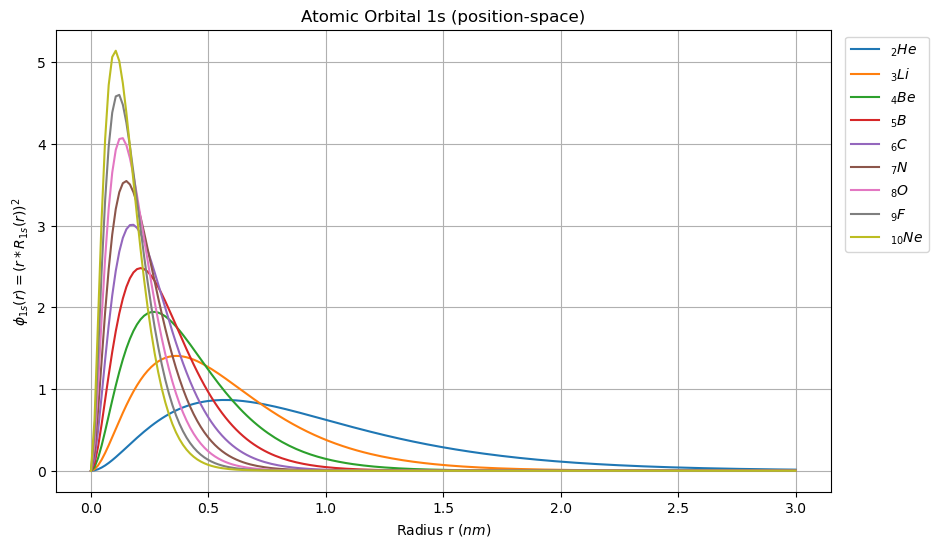

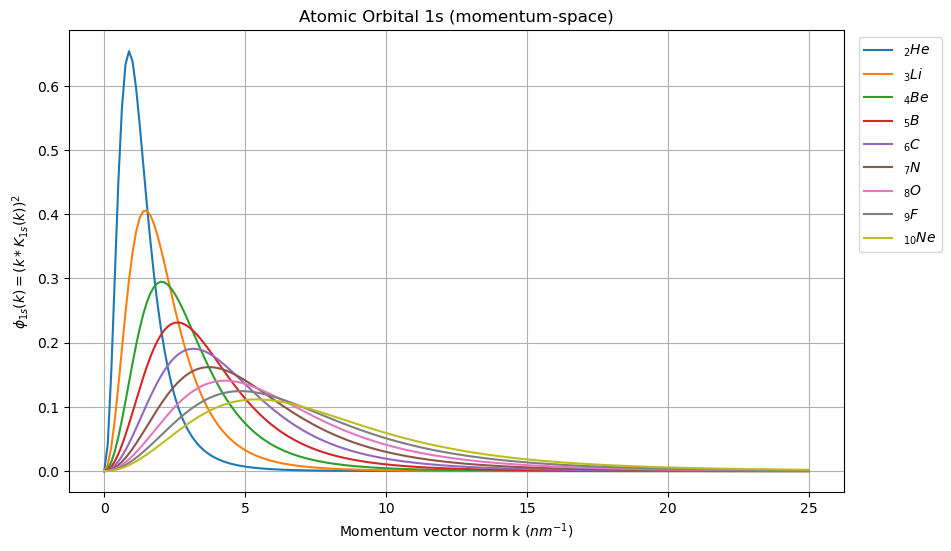

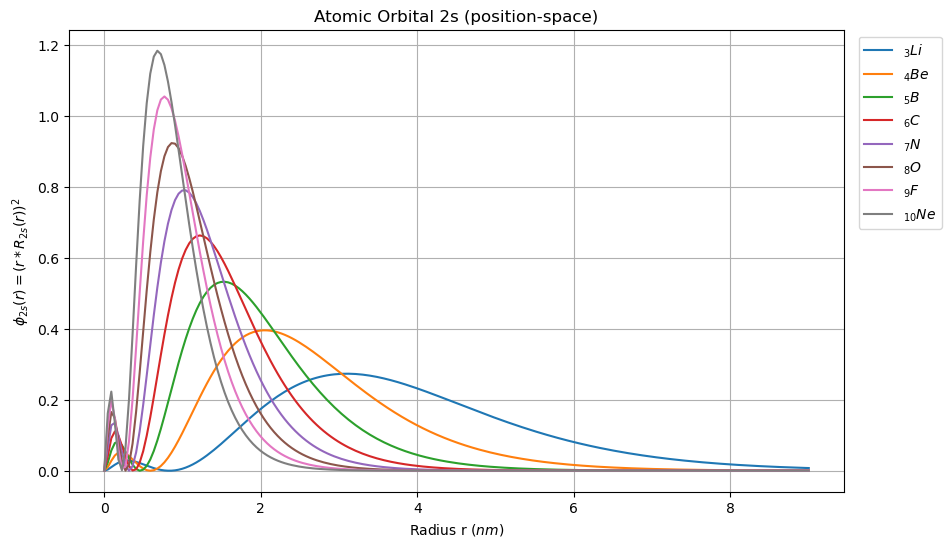

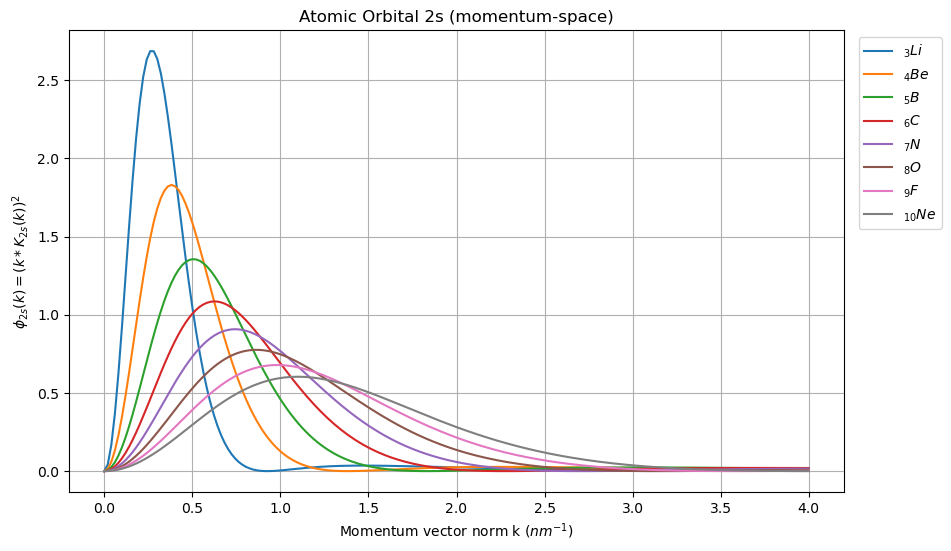

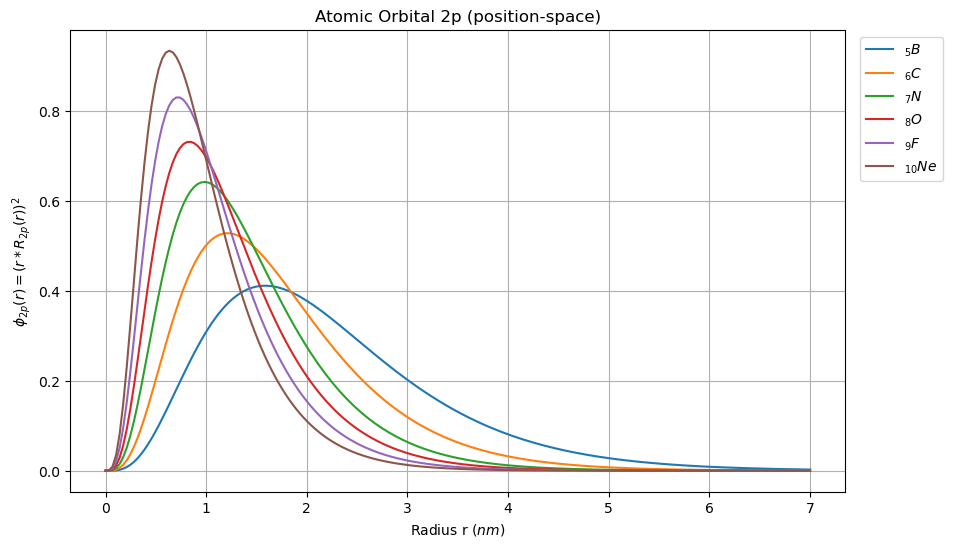

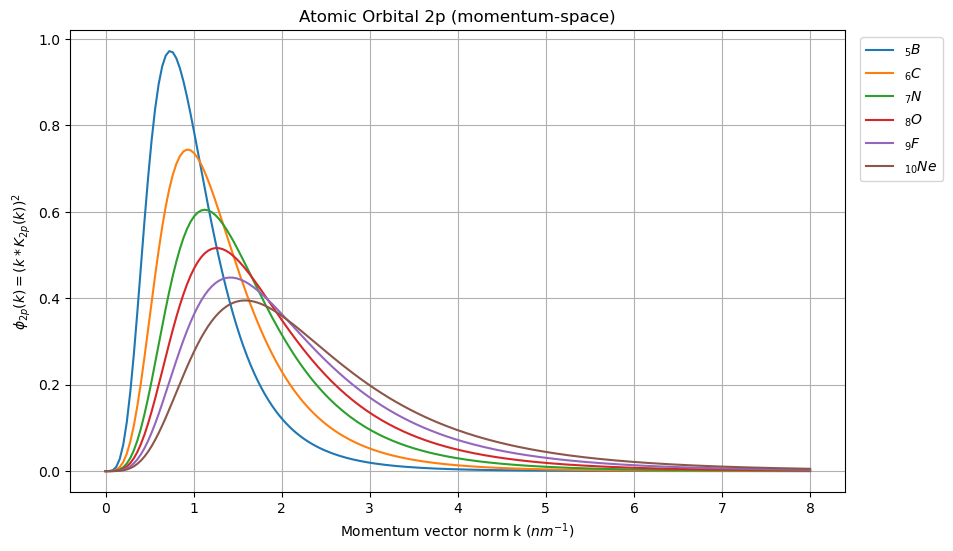

In [42]:
r_max = [3,9,7] # maximum r-axis range for 1s,2s,2p orbitals plots in position space 
k_max = [25,4,8] # maximum k-axis range for 1s,2s,2p orbitals plots in momenutm space 
RHFwf_plot(2,10,r_max,k_max)

**Expressions of the density distributions $ρ(r)$ and $n(k)$ and the local Shannon information entropies $S_r^{loc}(r)$ and $S_k^{loc}(k)$**

In [40]:
#RHFentrp_form(2,10)

**Plots of the density distributions $ρ(r)$ and $n(k)$ for the elements He-B (Z: 2-5)**

In [36]:
r_max = 8 # maximum r-axis range for electron density distribution in position space
k_max = 10 # maximum k-axis range for momentum density distribution in momentum space
#RHFdens_plot(2,5,r_max,k_max)

**Plots of the density distributions $ρ(r)$ and $n(k)$ for the elements C-Ne (Z: 6-10)**

In [37]:
r_max = 5 # maximum r-axis range for electron density distribution in position space
k_max = 11 # maximum k-axis range for momentum density distribution in momentum space
#RHFdens_plot(6,10,r_max,k_max)

**Calculations and plots of the total Shannon information entropy in position and momentum space**

In [38]:
#RHFentrp_plot(2,10)